## Telecom Customer Churn Retention

### Problem Statement

Customer churn can be an important problem for subscription-based companies. Loss of a customer leads to loss of revenue. 

The goal of the project is to identify key factors that lead to the churn outcome and improve customer retention.

### Data

- Source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
- This dataset has 7043 rows and 21 columns

### Importing Data and Packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math
warnings.filterwarnings('ignore')

### Importing the Dataset

In [3]:
df = pd.read_csv(r'data\WA_Fn-UseC_-Telco-Customer-Churn.csv')

### Printing top 10 records

In [4]:

pd.set_option('display.max_columns', None)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


### Dataset Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Observations: 

customerID: Unique ID assigned to each customer

gender: Gender of the customer → (Male / Female)

SeniorCitizen: Whether the customer is a senior citizen → (0 = No, 1 = Yes)

Partner: Whether the customer has a partner → (Yes / No)

Dependents: Whether the customer has dependents → (Yes / No)

tenure: Number of months the customer has stayed with the company

PhoneService: Whether the customer has a phone service → (Yes / No)

MultipleLines: Whether the customer has multiple phone lines → (Yes / No / No phone service)

InternetService: Type of internet service → (DSL / Fiber optic / No)

OnlineSecurity: Whether the customer has online security add-on → (Yes / No / No internet service)

OnlineBackup: Whether the customer has online backup add-on → (Yes / No / No internet service)

DeviceProtection: Whether the customer has device protection add-on → (Yes / No / No internet service)

TechSupport: Whether the customer has tech support add-on → (Yes / No / No internet service)

StreamingTV: Whether the customer streams TV → (Yes / No / No internet service)

StreamingMovies: Whether the customer streams movies → (Yes / No / No internet service)

Contract: Type of customer contract → (Month-to-month / One year / Two year)

PaperlessBilling: Whether the customer uses paperless billing → (Yes / No)

PaymentMethod: Payment method used by the customer

MonthlyCharges: Amount charged per month

TotalCharges: Total amount charged to the customer

Churn: Whether the customer left the company → (Yes / No)

### Data Checks

- Missing Values
- Duplicates
- Unusual Data Types
- Unique Values
- Numerical Trends

### Finding any missing values

In [6]:
missing_values = df.isna().sum() # Print to see each column

if missing_values.sum() == 0:
    print('No missing values in the dataset.')
else: 
    for col, count in missing_values.items():
        if count > 0:
            print(f"There are {count} missing values in the '{col}'.")

No missing values in the dataset.


### Finding any duplicate values

In [7]:
duplicate_count = df.duplicated().sum()

if duplicate_count == 0:
    print("No duplicate rows in the dataset.")
else:
    print(f"There are {duplicate_count} duplicate rows in the dataset.")


No duplicate rows in the dataset.


### Finding any incorrectly classified data types in columns

In [8]:
obj_cols = df.select_dtypes(include='object').columns

flagged = []

for col in obj_cols:
    converted = pd.to_numeric(df[col].astype(str).str.strip(), errors='coerce')

    if converted.notna().any() and not converted.notna().all():
        print(f"! '{col}' looks numeric but has some non-numeric values.")
        flagged.append(col)

if not flagged:
    print("No numeric-like object columns found.")


! 'TotalCharges' looks numeric but has some non-numeric values.


Note: Converting TotalCharges to numeric since it contains numeric values, with some blank entries treated as missing values.

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Checking unique values to get a better picture

In [10]:
for col in df.columns:
    print(f"Column name: {col}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("Unique values:", df[col].unique())
    print("-" * 100)

Column name: customerID
Number of unique values: 7043
Unique values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------------------------------------
Column name: gender
Number of unique values: 2
Unique values: ['Female' 'Male']
----------------------------------------------------------------------------------------------------
Column name: SeniorCitizen
Number of unique values: 2
Unique values: [0 1]
----------------------------------------------------------------------------------------------------
Column name: Partner
Number of unique values: 2
Unique values: ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Column name: Dependents
Number of unique values: 2
Unique values: ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Column name: tenure
Number of u

Note: The customerID column does not provide any predictive or descriptive value for the analysis. It will be excluded from the dataset to avoid introducing noise into the modeling process.

In [11]:
df = df.drop('customerID', axis=1)

#### Feature extraction

In [12]:
numerical_features = [f for f in df.columns if df[f].dtype != 'object' and df[f].nunique() > 2]
binary_features = [col for col in df.columns if df[col].nunique() == 2]
categorical_features = list(set([f for f in df.columns if df[f].dtype == 'object'] + binary_features) - {'Churn'})
target = df['Churn']
print("Numerical Features: ",numerical_features)
print("Categorical Features: ", categorical_features)
print("Target: ", [target.name])

Numerical Features:  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Features:  ['PaperlessBilling', 'StreamingMovies', 'Contract', 'SeniorCitizen', 'PhoneService', 'OnlineBackup', 'PaymentMethod', 'InternetService', 'Dependents', 'Partner', 'MultipleLines', 'StreamingTV', 'DeviceProtection', 'gender', 'TechSupport', 'OnlineSecurity']
Target:  ['Churn']


### Numerical Trends

In [13]:
df[numerical_features].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


In [14]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


What we know so far: 

* `tenure` and `TotalCharges` show a strong positive correlation (0.82), as total charges grow with customer tenure.
* `MonthlyCharges` has a moderate correlation (0.65) with `TotalCharges`, reflecting higher bills leading to higher totals.
* `tenure` ranges from 0–72 months, while `MonthlyCharges` range from \$18.25 to \$118.75, indicating varied service plans.
* `TotalCharges` is highly variable, from \$18.80 to \$8,684.80, driven by differences in tenure and plan pricing.

This shows that there is a need for further analysis combined with all the numerical and categorical features. 

### Univariate Analysis

#### Numerical Features

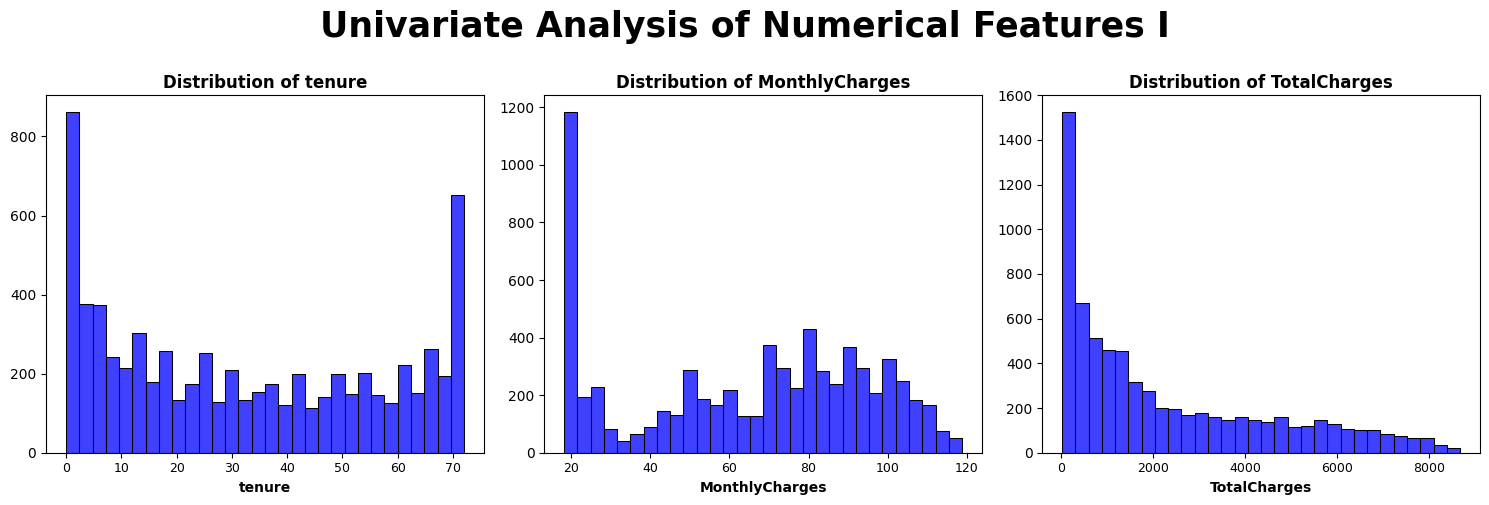

In [15]:
fig, axes = plt.subplots(nrows=math.ceil(len(numerical_features)/3), ncols=3, figsize=(15, 5*math.ceil(len(numerical_features)/3)))

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df[col].dropna(), bins=30, ax=axes[i], color = 'blue')
    axes[i].set_title(f'Distribution of {col}', pad=5, fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', labelrotation=0, labelsize=9)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(col, fontweight='bold')

fig.suptitle('Univariate Analysis of Numerical Features I', fontsize=25, y=1, fontweight='bold')

plt.tight_layout()
plt.show()

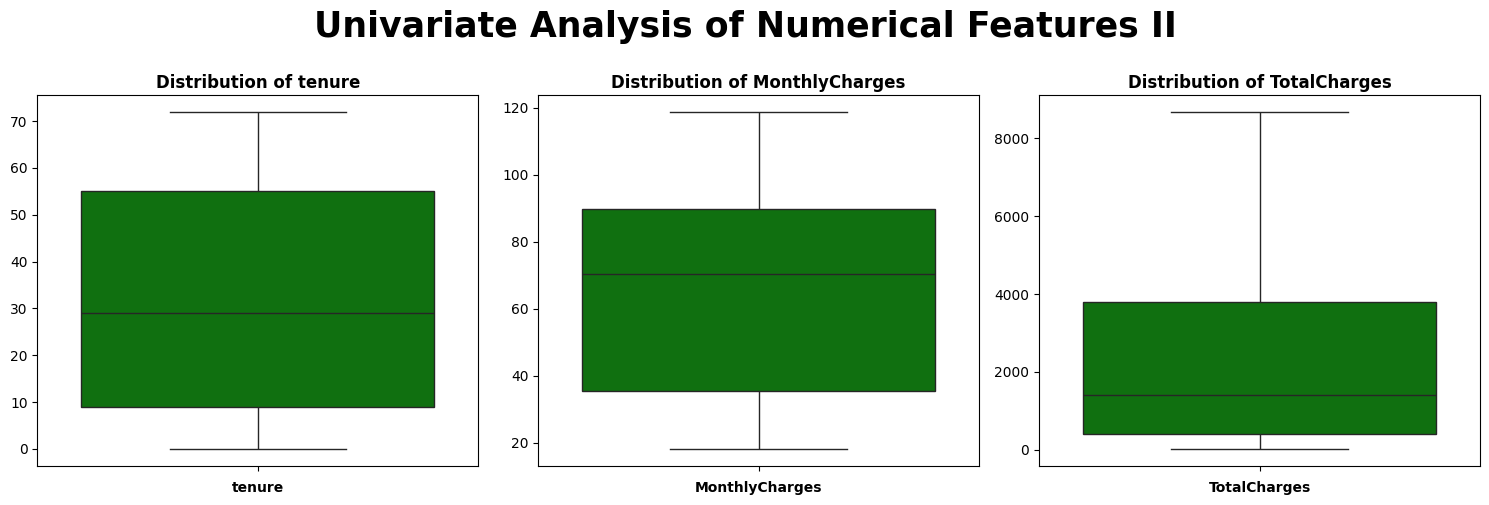

In [16]:
fig, axes = plt.subplots(nrows=math.ceil(len(numerical_features)/3), ncols=3, figsize=(15, 5*math.ceil(len(numerical_features)/3)))

axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(df[col].dropna(), ax=axes[i], color = 'green')
    axes[i].set_title(f'Distribution of {col}', pad=5, fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', labelrotation=0, labelsize=9)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(col, fontweight='bold')

fig.suptitle('Univariate Analysis of Numerical Features II', fontsize=25, y=1, fontweight='bold')

plt.tight_layout()
plt.show()

### Interpretation
- Tenure: Median tenure is ~30 months, with most customers between 0–72 months. No significant outliers.

- MonthlyCharges: Median is ~$75, most customers pay between $40 and $90. Distribution is fairly even, no extreme outliers.

- TotalCharges: Median is ~$2,000, most customers between $500 and $4,000. Distribution is slightly right-skewed, with a few very high values.

#### Categorical Features

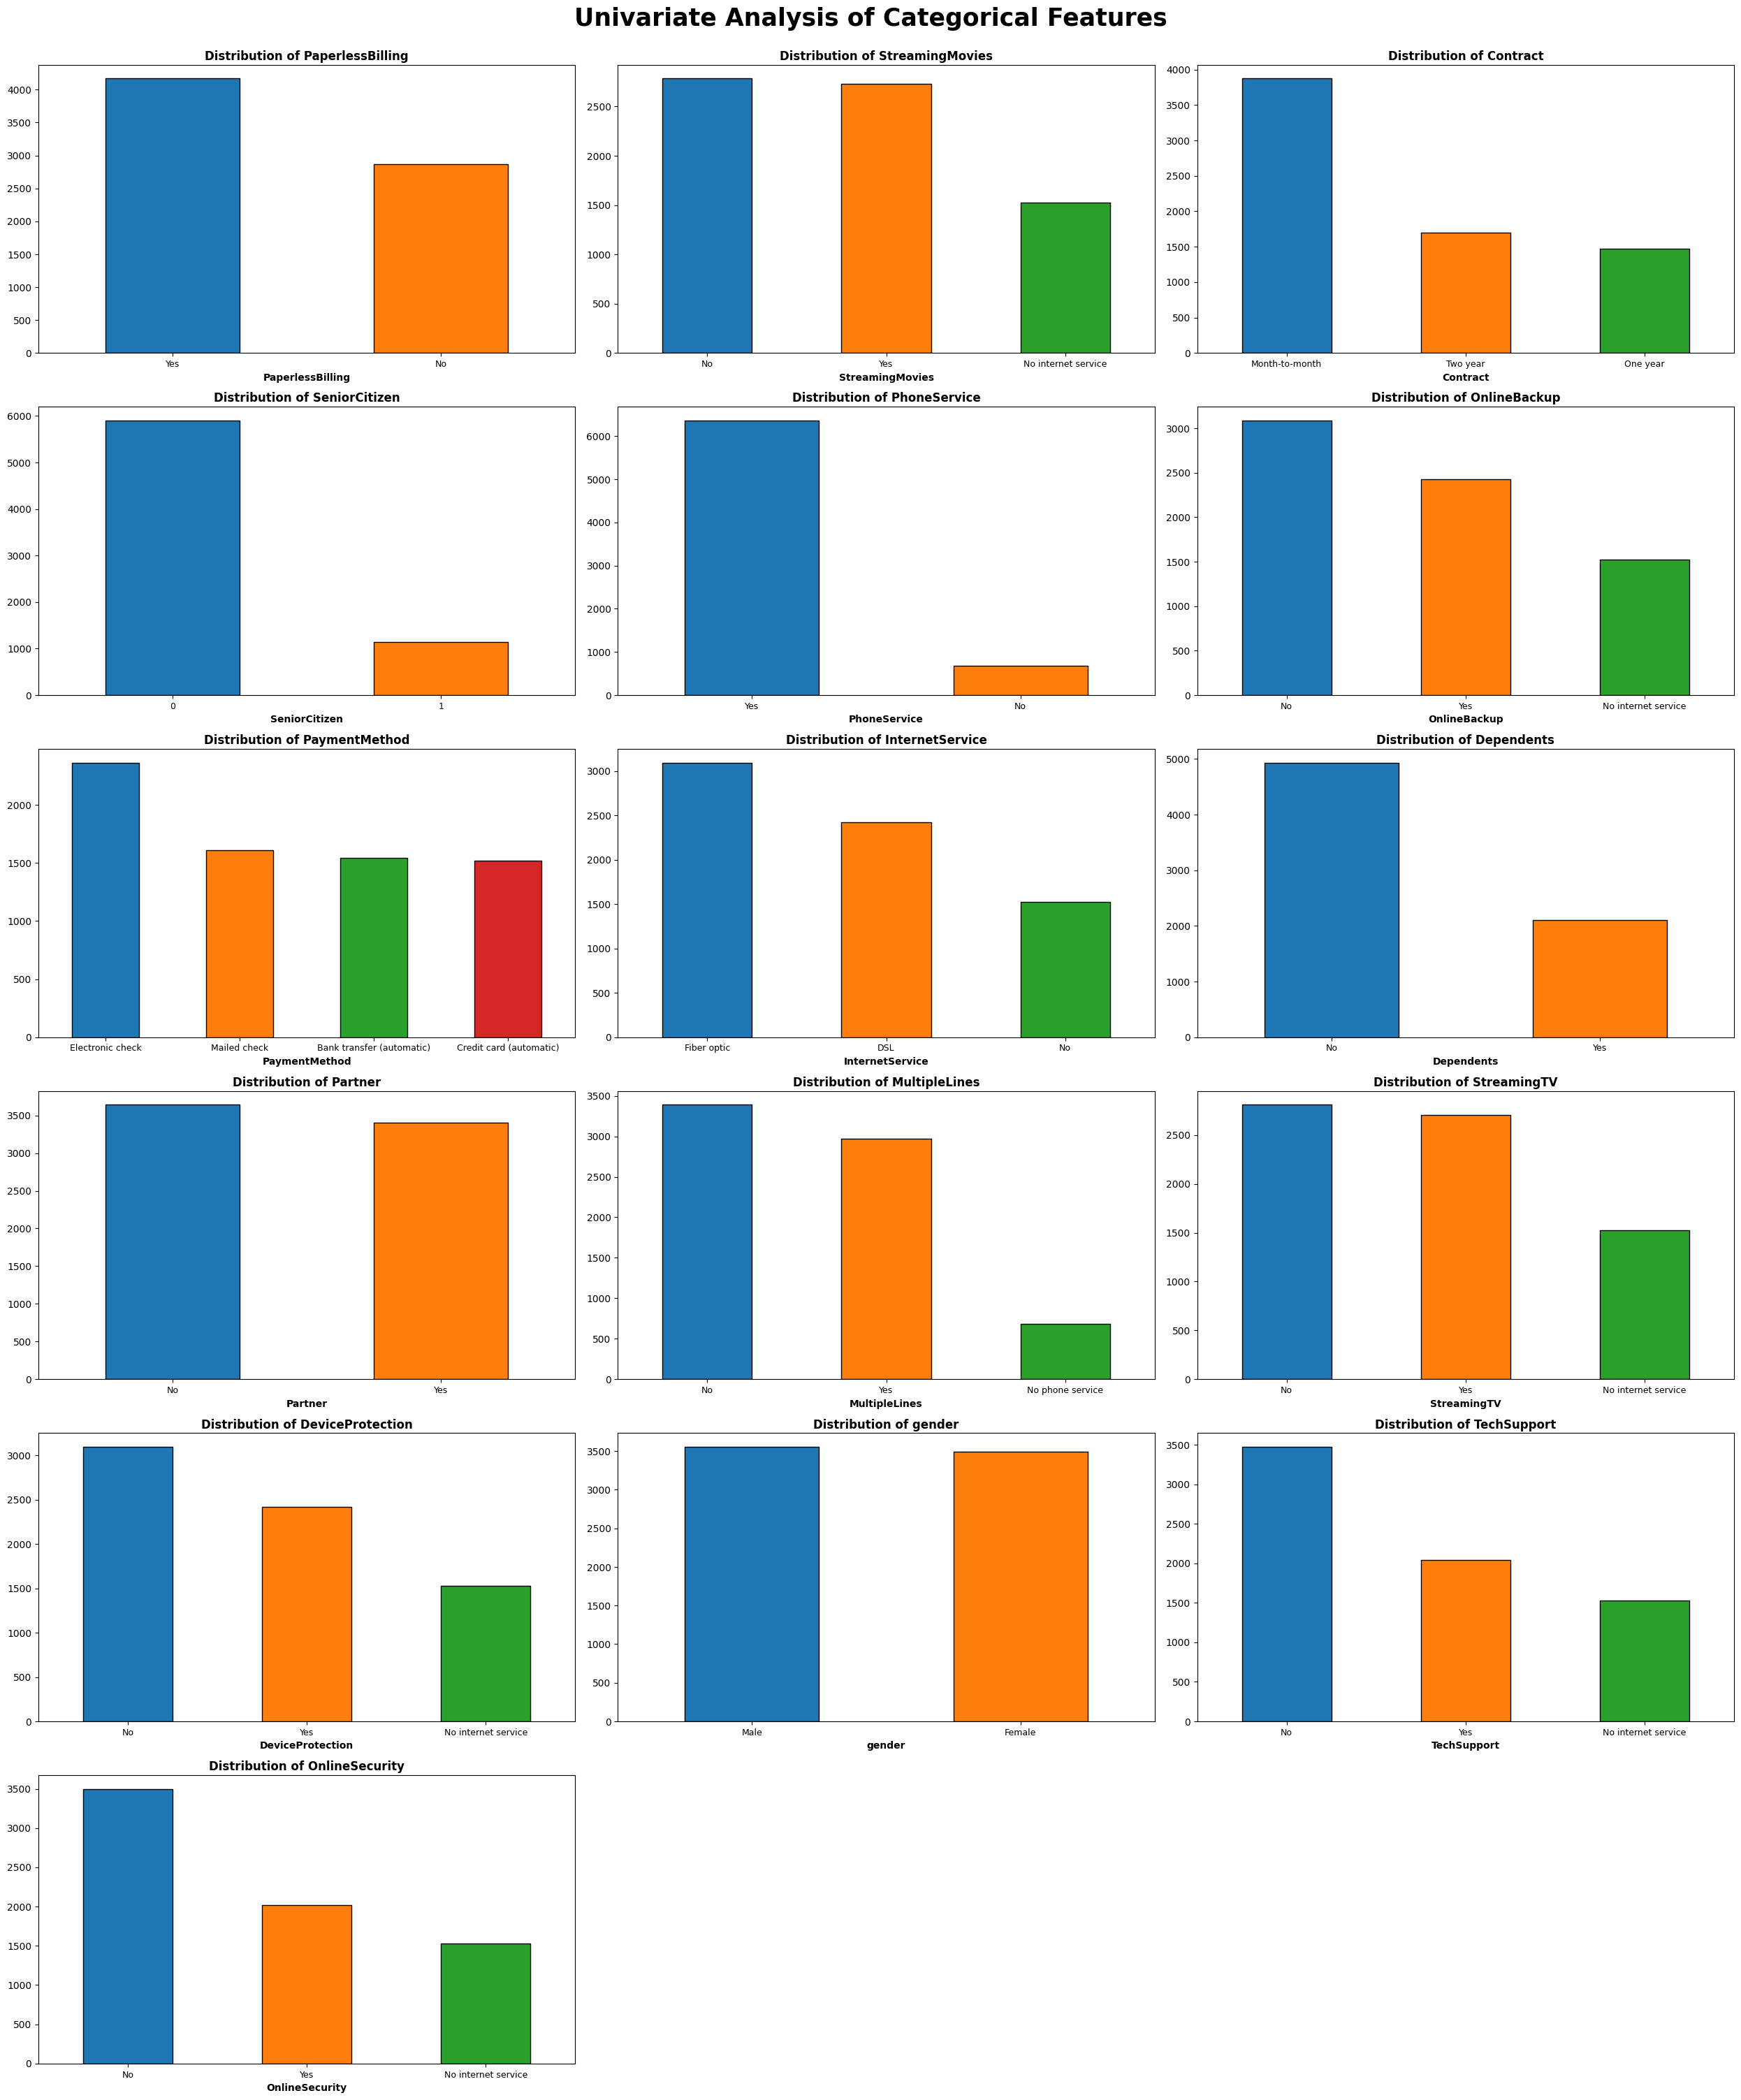

In [17]:
fig, axes = plt.subplots(nrows=math.ceil(len(categorical_features)/3), ncols=3, figsize=(25, 5*math.ceil(len(categorical_features)/3)))

axes = axes.flatten()

colors = list(plt.cm.tab10.colors)

for i, col in enumerate(categorical_features):
    freq = df[col].value_counts()
    freq.plot(kind='bar', ax=axes[i], color=colors[:len(freq)], edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', pad=5, fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', labelrotation=0, labelsize=9)
    axes[i].set_ylabel('')
    axes[i].set_xlabel(col, fontweight='bold')

fig.suptitle('Univariate Analysis of Categorical Features', fontsize=25, y=1, fontweight='bold')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1)
plt.show()

#### Target


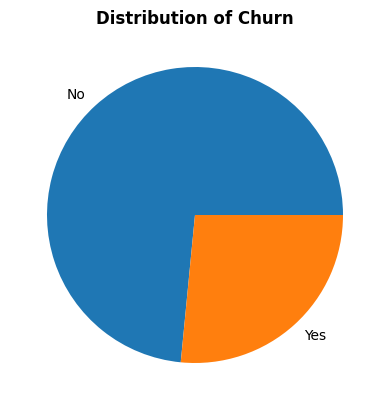

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 5))

freq = target.value_counts()
freq.plot(kind='pie', ax=axes, colors=colors[:len(freq)], ylabel='')
axes.set_title(f'Distribution of {target.name}', pad=5, fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

#### Implications: 

- Certain services (like contract type, payment method, internet type, and security/backup services) seem to have strong differences in distribution that could be linked to churn.

- Since churn is imbalanced, the real insight will come from comparing churn rates within each category (bivariate analysis).

### Bivariate Analysis

#### Numerical Features

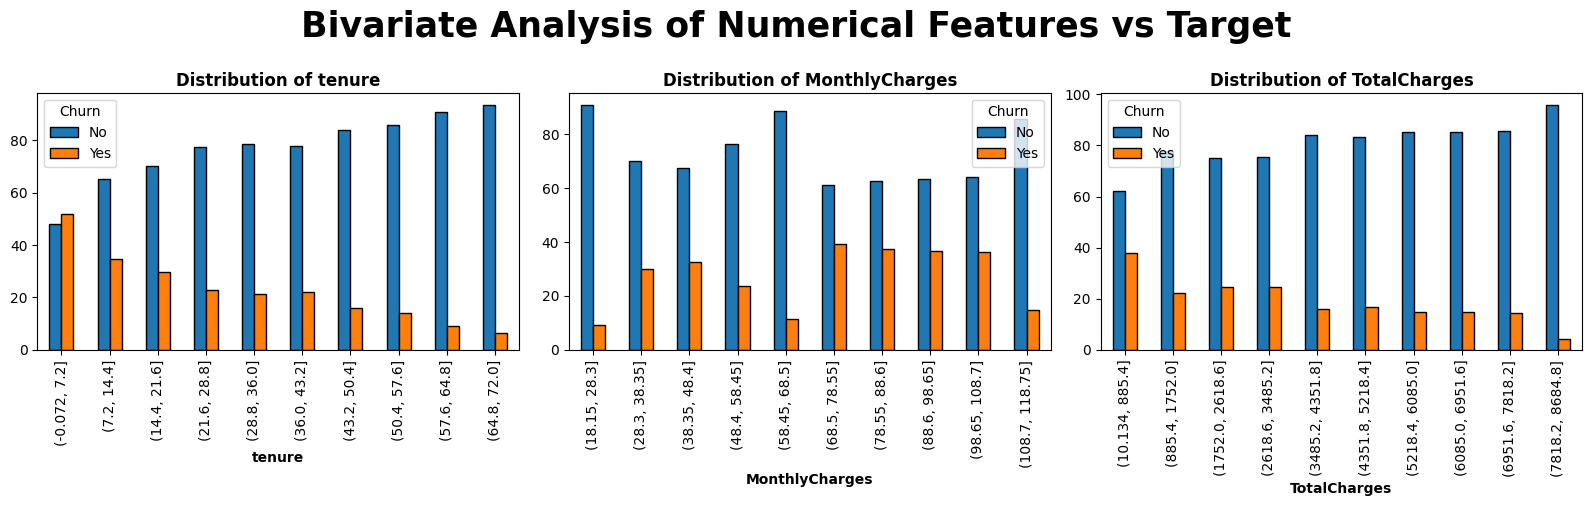

In [19]:
fig, axes = plt.subplots(nrows=math.ceil(len(numerical_features)/3), ncols=3, figsize=(16, 5*math.ceil(len(numerical_features)/3)))

axes = axes.flatten()

colors = list(plt.cm.tab10.colors)

for i, col in enumerate(numerical_features):
    bins = pd.cut(df[col], bins=10, ordered=True)
    ct = pd.crosstab(bins, df['Churn'], normalize='index') * 100
    ct.sort_index(inplace=True)
    ct.plot(kind='bar', ax=axes[i], color=colors[:len(ct.columns.to_list())], edgecolor='black', rot=90)
    axes[i].set_title(f'Distribution of {col}', pad=5, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('')
    axes[i].set_xlabel(col, fontweight='bold')
    
fig.suptitle('Bivariate Analysis of Numerical Features vs Target', fontsize=25, y=1, fontweight='bold')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout(pad=1)
plt.show()

##### Insights: 
- Churn is higher for cusotmers who left early.
- Churn is higher for customers whose monthly charges range from 70 to 100 dollars.
- High total charges have lower churn -- likely from long term tenure. 

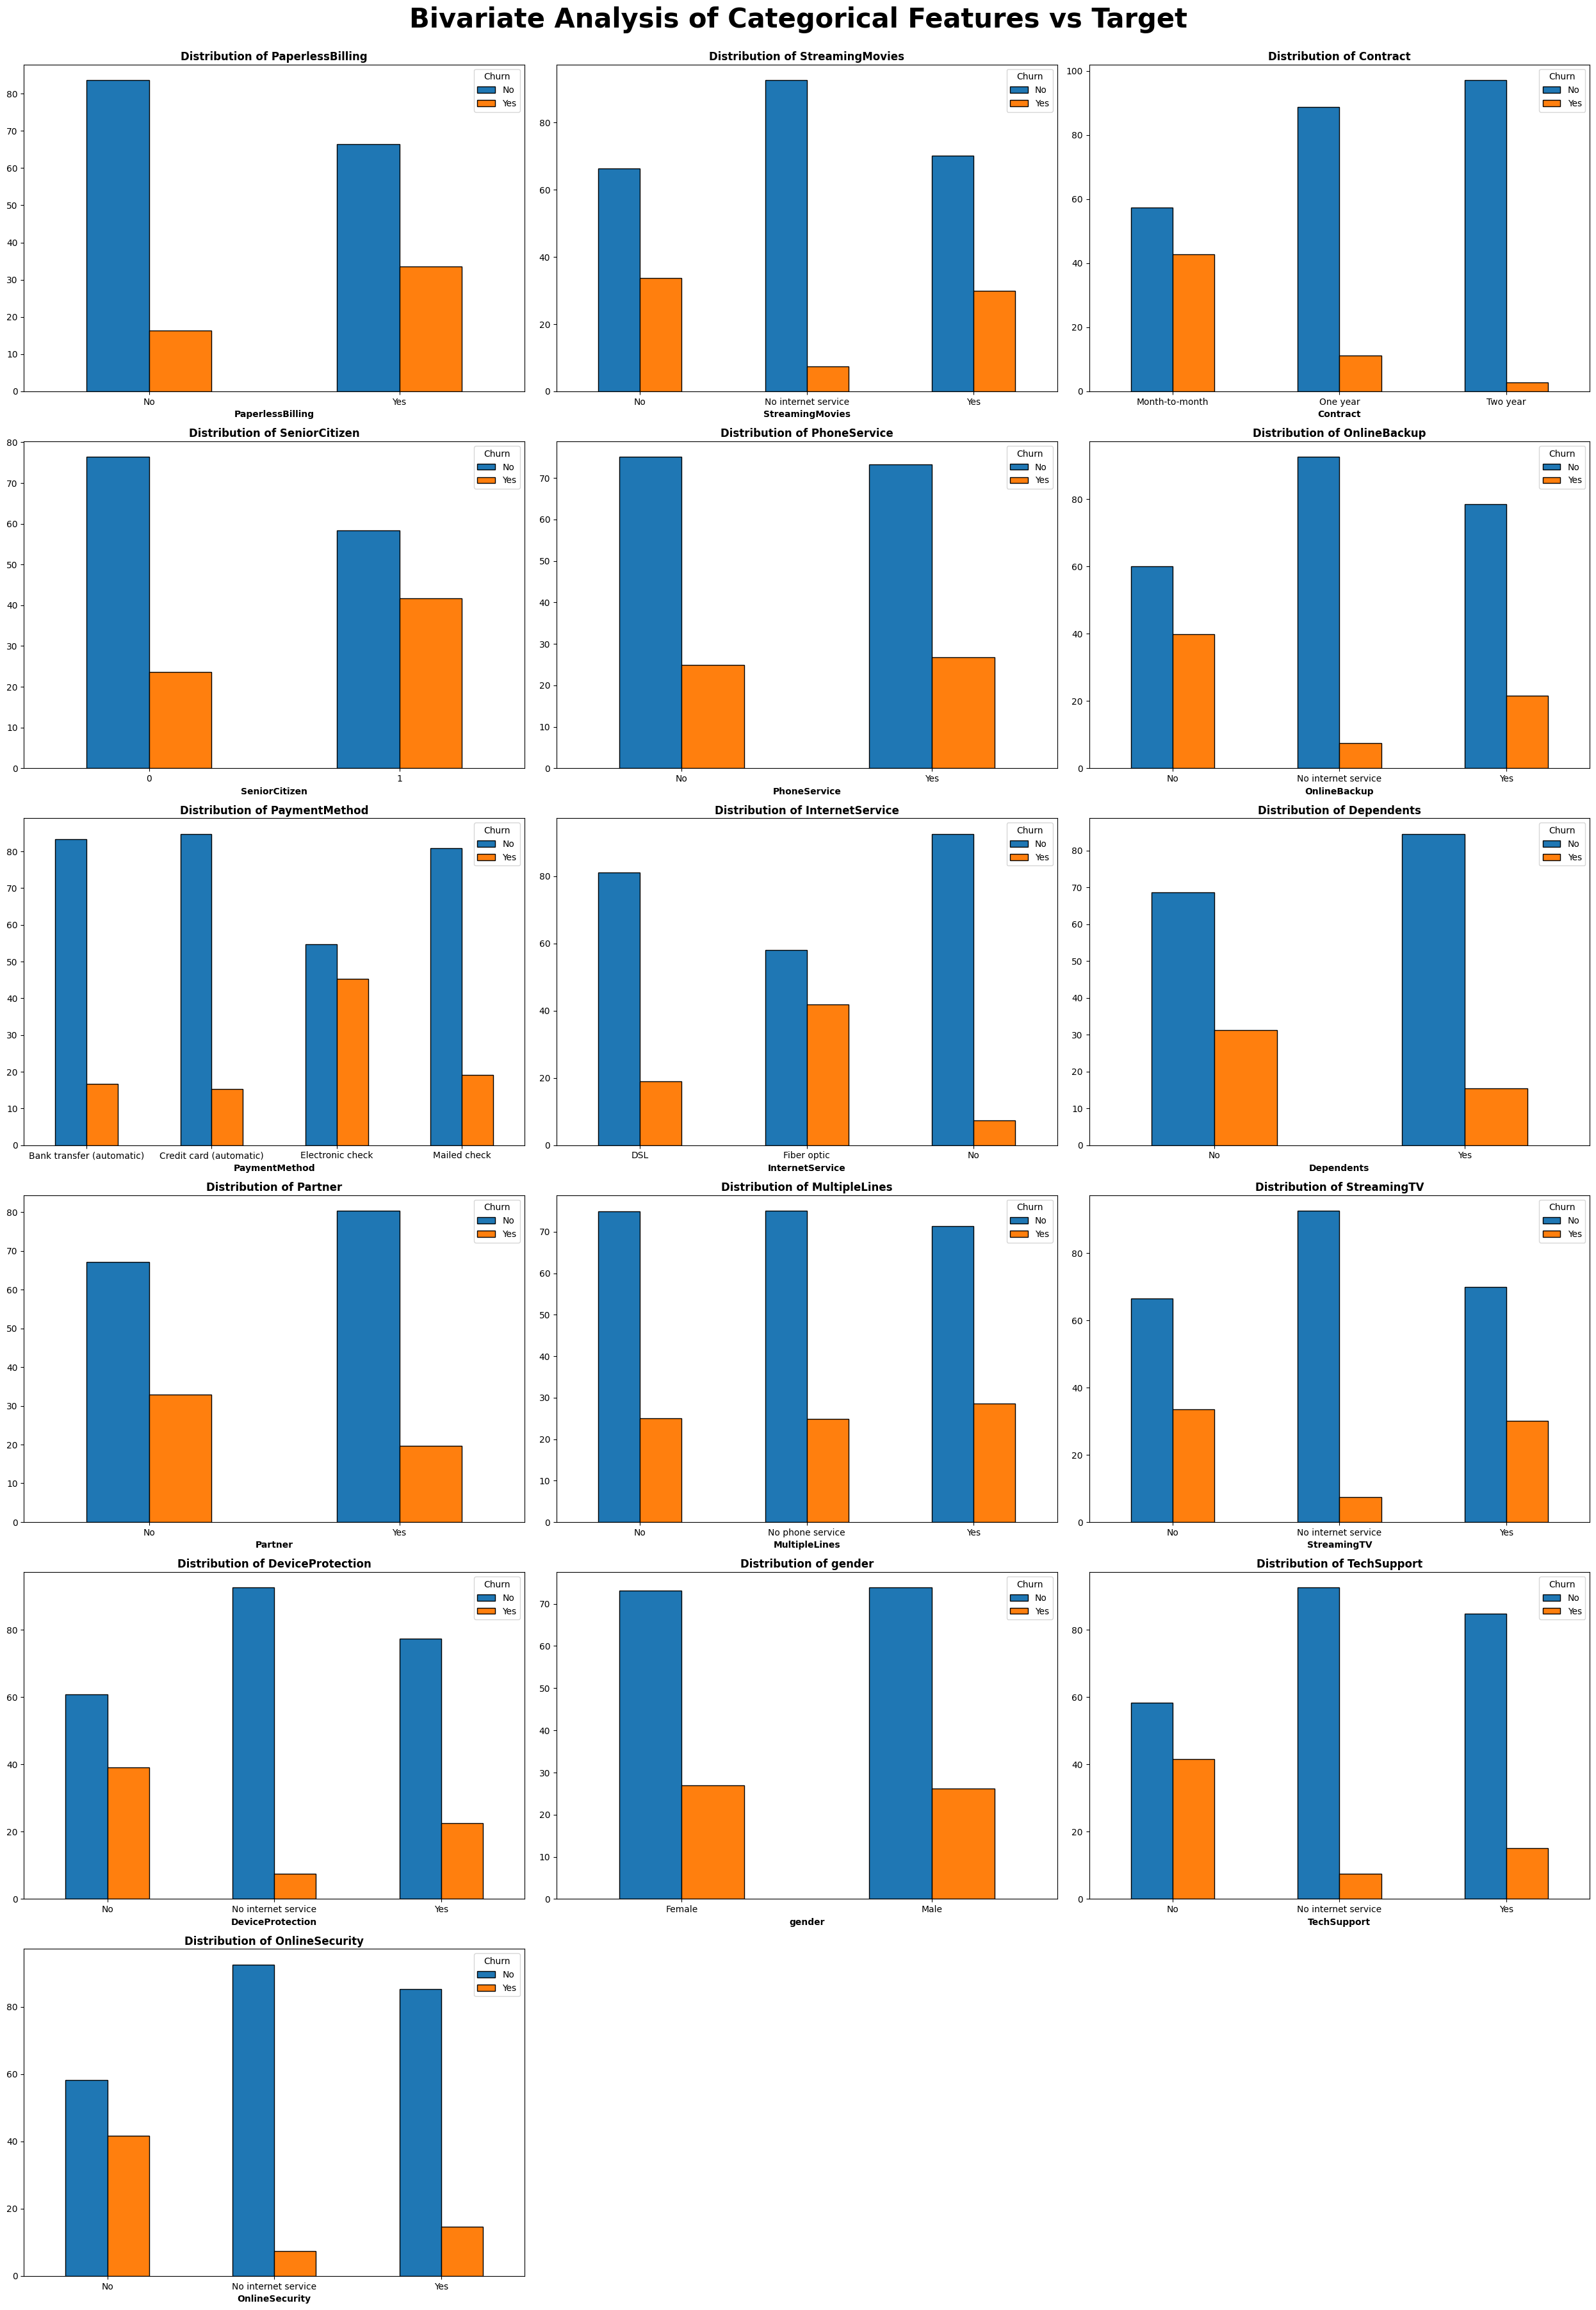

In [20]:
fig, axes = plt.subplots(nrows=math.ceil(len(categorical_features)/3), ncols=3, figsize=(25, 6*math.ceil(len(categorical_features)/3)))

axes = axes.flatten()

colors = list(plt.cm.tab10.colors)

for i, col in enumerate(categorical_features):
    ct = pd.crosstab(df[col], df['Churn'], normalize='index')*100
    ct.plot(kind='bar', ax=axes[i], color=colors[:len(ct.columns.to_list())], edgecolor='black', rot=0)
    axes[i].set_title(f'Distribution of {col}', pad=5, fontsize=12, fontweight='bold')
    axes[i].set_ylabel('')
    axes[i].set_xlabel(col, fontweight='bold')
    
    
fig.suptitle('Bivariate Analysis of Categorical Features vs Target', fontsize=30, y=1, fontweight='bold')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1)
plt.show()

##### Insights: 

###### High Churn Categories:

- Electronic Check (in PaymentMethod) has a much higher churn rate compared to other payment methods.

- Month-to-month contracts show far higher churn compared to one-year or two-year contracts.

- Fiber optic customers (in InternetService) have higher churn percentages than DSL or those without internet service.

- Customers with No online security, no online backup, no device protection, or no tech support churn significantly more.

- Customers with PaperlessBilling has higher churn rates than those without paperless billing.

###### Low Churn Categories:

- Two-year contracts have extremely low churn.

- Customers with extra services (security, backup, protection, etc.) tend to churn less.

###### Minimal Relationship:

- Gender, MultipleLines, and Partner show almost no strong correlation with churn.



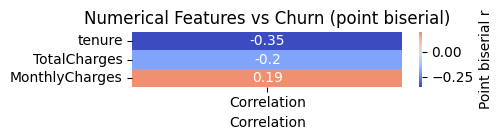

,Correlation
tenure,-0.352229
TotalCharges,-0.199484
MonthlyCharges,0.193356


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

# 1) Make sure the target is binary numeric
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1}).astype('float')

def pointbiserial_heatmap(df, target_col, numeric_features, title="Numerical Features vs Churn (point biserial)"):
    results = {}
    skipped = []

    for col in numeric_features:
        # 2) Coerce to numeric (anything non-numeric -> NaN)
        x = pd.to_numeric(df[col], errors='coerce')
        y = df[target_col].astype('float')

        # 3) Pairwise clean: drop NaNs/±∞ from either vector
        pair = pd.DataFrame({'x': x, 'y': y}).replace([np.inf, -np.inf], np.nan).dropna()

        # 4) Skip if constant or too few rows
        if pair['x'].nunique() <= 1 or pair['y'].nunique() != 2 or len(pair) < 3:
            skipped.append(col)
            continue

        r, p = pointbiserialr(pair['y'], pair['x'])
        results[col] = r

    # Report any skipped columns (optional)
    if skipped:
        print("Skipped (constant/insufficient/NaNs only):", skipped)

    corr_df = pd.DataFrame.from_dict(results, orient='index', columns=['Correlation']).sort_values('Correlation')
    plt.figure(figsize=(5, max(1.5, 0.45*len(corr_df))))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', center=0, cbar_kws={'label':'Point biserial r'})
    plt.title(title, fontsize=12)
    plt.xlabel('Correlation')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    return corr_df

# Run it
pointbiserial_heatmap(df, 'Churn_binary', numerical_features)


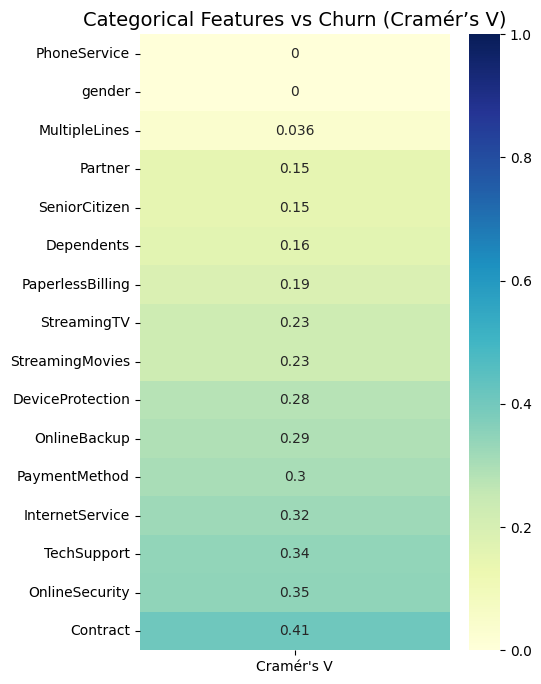

In [22]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    table = pd.crosstab(x, y)
    chi2 = chi2_contingency(table)[0]
    n = table.sum().sum()
    phi2 = chi2 / n
    r, k = table.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

def categorical_vs_churn(df, target, categorical_features):
    correlations = {}
    for col in categorical_features:
        if df[col].nunique() > 1:
            correlations[col] = cramers_v(df[col], df[target])
    corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Cramér\'s V'])
    corr_df.sort_values("Cramér's V", inplace=True)

    plt.figure(figsize=(5, len(corr_df)*0.5))
    sns.heatmap(corr_df, annot=True, cmap='YlGnBu', vmin=0, vmax=1)
    plt.title('Categorical Features vs Churn (Cramér’s V)', fontsize=14)
    plt.show()

categorical_vs_churn(df, 'Churn', categorical_features)


In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select only numeric predictors (excluding target)
X = df[numerical_features].drop(columns=['Churn'], errors='ignore')

# Add a constant for intercept
X_const = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) 
                   for i in range(X_const.shape[1])]

# Drop constant from output
vif_data = vif_data[vif_data["Feature"] != "const"]

print(vif_data.sort_values(by="VIF", ascending=False))


MissingDataError: exog contains inf or nans